### **Library and Data Preparation**

In [ ]:
#Importing and tuning libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing data from github
df = pd.read_csv('https://raw.githubusercontent.com/fazrialf/DataScience-Things/main/Dataset_9%20-%20Banking.csv')

#Removing unused columns
df.drop(['Surname','RowNumber','CustomerId'], axis=1, inplace=True)

#Print df
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **Exploratory Data Analysis and Preprocessing**

#### **EDA Preparation**

In [ ]:
#Copying dataframe for EDA
df_eda = df.copy()

In [ ]:
sns.set_theme()

#### **1. CreditScore**

<Figure size 504x432 with 0 Axes>

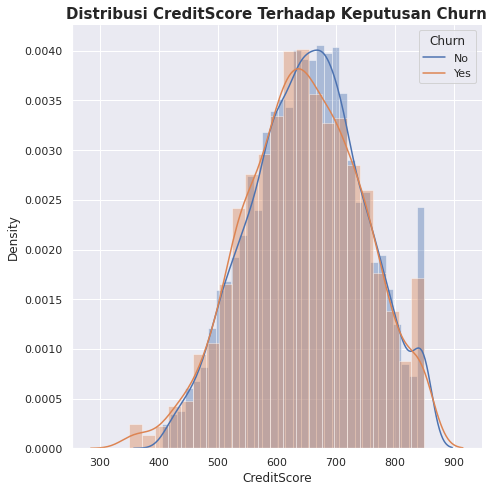

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.FacetGrid(df_eda, hue="Exited", height=7) \
.map(sns.distplot, "CreditScore")
plt.title('Distribusi CreditScore Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Visualisasi di atas memperlihatkan perbandingan data yang melakukan exit dan yang tidak berdasarkan Credit Score pengguna. Terlihat jelas bahwa yang memiliki Credit Score tinggi mayoritas memilih bertahan/tidak exit. Sedangkan bagi yang memiliki skor sangat rendah memilih untuk exit. Selebihnya, tidak nampak perbedaan yang jelas antara exit maupun tidaknya seseorang jika dilihat dari credit score pada range 500 hingga 800.

#### **2. Geography**

Visualisasi di atas menunjukkan bahwa separuh dari pengguna Bank ini merupakan orang berkewarganegaraan France. Sedangkan separuh lainnya terbagi rata antara kewarganegaraan Germany dan Spain.

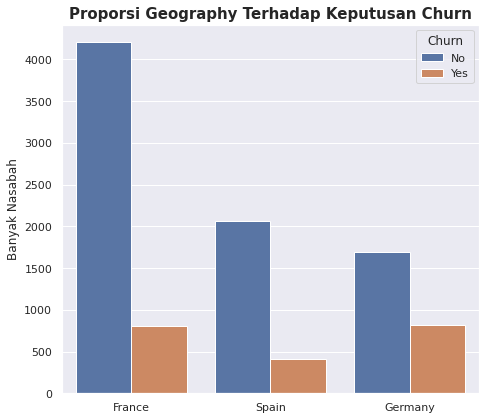

In [ ]:
#Hubungan Geography dengan Exited
fig = plt.figure(figsize=(7,6))
sns.countplot(x='Geography', hue = 'Exited',data = df_eda)
plt.title('Proporsi Geography Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.ylabel('Banyak Nasabah')
plt.xlabel('')
plt.tight_layout()
plt.show()

Visualisasi di atas memperlihatkan perbandingan data yang melakukan exit dan yang tidak berdasarkan asal negara pengguna. Data Germany menunjukkan bahwa separuh dari penggunanya memilih untuk exit, bahkan jumlahnya melebihi France yang notabene penggunanya dua kali lipat lebih banyak dari Germany. Sedangkan France dan Spain memiliki perbandingan exited yang sama, yaitu kurang lebih seperempatnya.

#### **3. Gender**

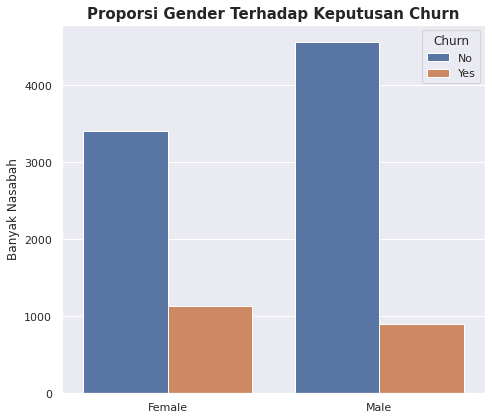

In [ ]:
#Hubungan Geography dengan Exited
fig = plt.figure(figsize=(7,6))
sns.countplot(x='Gender', hue='Exited',data = df_eda)
plt.title('Proporsi Gender Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.ylabel('Banyak Nasabah')
plt.xlabel('')
plt.tight_layout()
plt.show()


Visualisasi diatas menunjukkan perbandingan gender yang melakukan exited dan tidak. Dapat dilihat bahwa gender female yang paling banyak melakukan Exited, sedangkan male tidak.


#### **4. Age**

<Figure size 504x432 with 0 Axes>

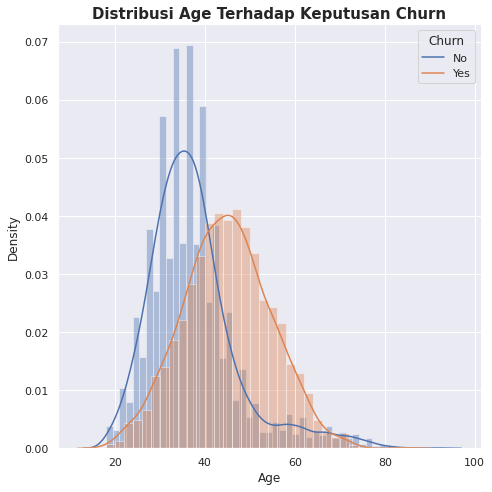

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.FacetGrid(df_eda, hue="Exited", height=7) \
.map(sns.distplot, "Age")
plt.title('Distribusi Age Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Dari visualilasi diatas dapat dilihat kisaran umur dengan customer terbanyak yaitu 30an sampai 40 tahun. 

#### **5. Tenure**

In [ ]:
#kolom tenure
df_eda['interval_tenure'] = pd.cut(x=df_eda['Tenure'], bins=[1,5,10],labels=['Less Than 5 Yr', 'More Than 5 Yr'],include_lowest=True)

Fungsi diatas digunakan dalam membuat kolom baru interval_tenure untuk tenure tetapi dengan dikelompokan kurang dari sama dengan 5 tahun dan lebih dari 5 tahun.

In [ ]:
status = pd.DataFrame(df_eda['interval_tenure'].value_counts())
status = status.rename(columns={'interval_tenure':'Amount'})

status.head()

,Amount
Less Than 5 Yr,5093
More Than 5 Yr,4494


Total kurang dari sama  dengan 5 tahun yaitu 5093 lebih banyak daripada lebih dari 5 tahun yang hanya 4494.

In [ ]:
interval_tenure = pd.DataFrame(df_eda['interval_tenure'].value_counts(normalize=True))*100
interval_tenure = interval_tenure.rename(columns={'interval_tenure':'Proportion'})
display(interval_tenure)

,Proportion
Less Than 5 Yr,53.124022
More Than 5 Yr,46.875978


Dari visualisasi diatas menunjukan proportion tenure kurang dari sama dengan 5 tahun lebih banyak yaitu 53% daripada tenure lebih dari 5 tahun yaitu 47%.

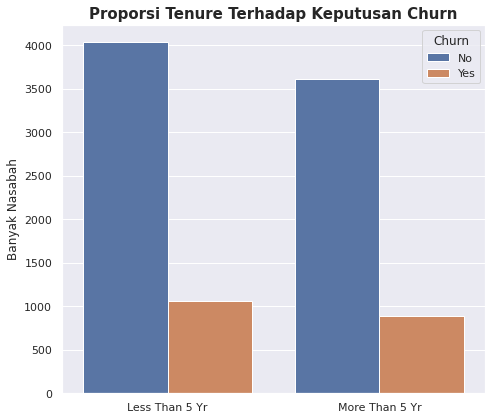

In [ ]:
#Tenure dengan Exited
fig = plt.figure(figsize=(7,6))
sns.countplot(x='interval_tenure', hue='Exited',data = df_eda)
plt.title('Proporsi Tenure Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.ylabel('Banyak Nasabah')
plt.xlabel('')
plt.tight_layout()
plt.show()

Visualisasi diatas memperlihatkan perbandingan data yang melakukan exit dan yang tidak berdasarkan tenure. Tenure kurang dari 5 tahun lebih banyak melakukan exit dan tidak dibandingkan dengan tenure lebih 5 tahun.

#### **6. Balance**

<Figure size 504x432 with 0 Axes>

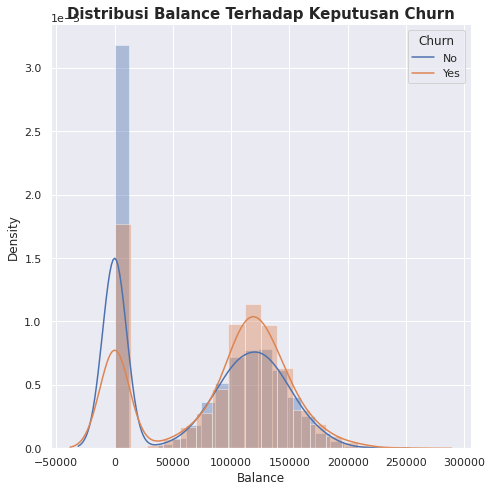

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.FacetGrid(df_eda, hue="Exited", height=7) \
.map(sns.distplot, "Balance")
plt.title('Distribusi Balance Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Karena ada banyak customers dengan balance nol, membuat fitur biner baru yang menunjukkan apakah customers memiliki balance nol. 

In [ ]:
check_nol = df_eda
check_nol['Balance_binary'] = df_eda['Balance'].where(df_eda['Balance'] == 0, 1)
check_nol['Balance_binary'].value_counts()

1.0    6383
0.0    3617
Name: Balance_binary, dtype: int64

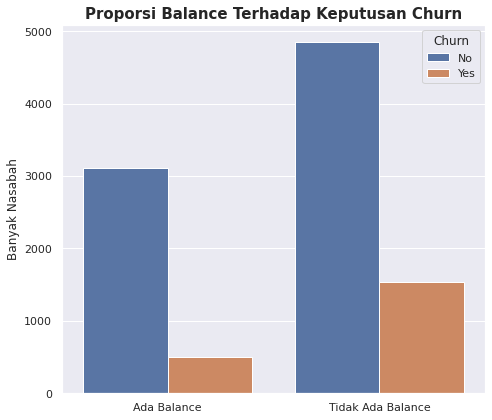

In [ ]:
#Tenure dengan Exited
fig = plt.figure(figsize=(7,6))
sns.countplot(x='Balance_binary', hue='Exited',data = check_nol)
plt.title('Proporsi Balance Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.ylabel('Banyak Nasabah')
plt.xlabel('')
plt.xticks([0,1], ['Ada Balance', 'Tidak Ada Balance'])
plt.tight_layout()
plt.show()

Jadi customer dengan Balance 0 dan tidak keluar ada 3117

Jadi customer Balance 0 dan pergi ada 500

Jadi Customer Balance selain 0 dan tidak keluar ada 4846

Jadi customer Balance selain 0 dan pergi ada 1537

#### **7. NumOfProducts**

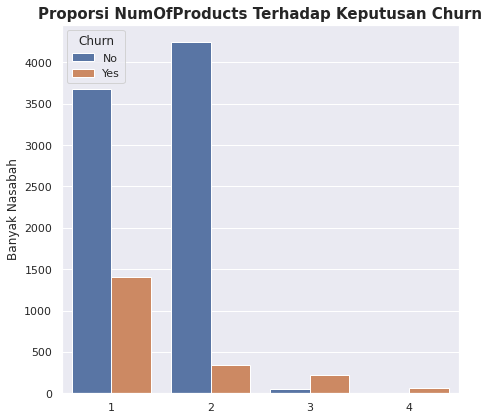

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.countplot(x='NumOfProducts', hue='Exited',data = df_eda)
plt.title('Proporsi NumOfProducts Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.ylabel('Banyak Nasabah')
plt.xlabel('')
plt.tight_layout()
plt.show()

analisa diatas menunjukkan jumlah product dari setiap customer, untuk customer yang memiliki jumlah product sedikit (1 & 2), mereka cenderung bertahan

####**8.HasCrCard**

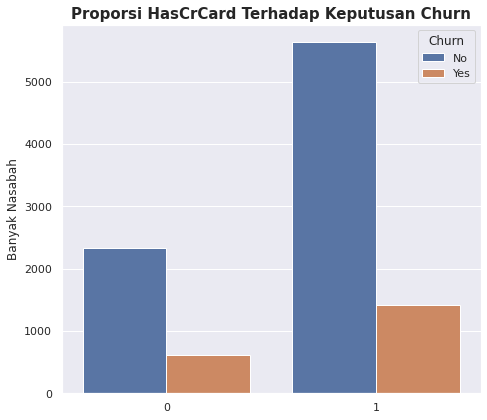

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.countplot(x='HasCrCard', hue='Exited',data = df_eda)
plt.title('Proporsi HasCrCard Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.ylabel('Banyak Nasabah')
plt.xlabel('')
plt.tight_layout()
plt.show()

visualisasi diatas menunjukkan jumlah kepemilikan kartu kredit untuk customer churn dan bertahan. untuk customer yang memiliki kartu kredit, mereka cenderung lebih bertahan.

####**9. IsActiveMember**

Berdasarkan visualisasi dibawah ini, member yang tidak aktif memiliki proposi churn lebih tinggi dibandingkan member yang aktif.

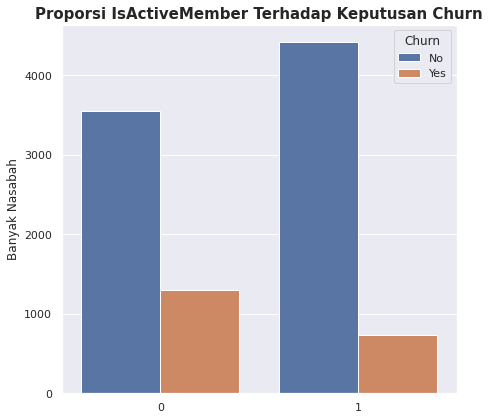

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.countplot(x='IsActiveMember', hue='Exited',data = df_eda)
plt.title('Proporsi IsActiveMember Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.ylabel('Banyak Nasabah')
plt.xlabel('')
plt.tight_layout()
plt.show()

####**10. EstimatedSalary**

Distribusi pada kolom EstimatedSalary 

<Figure size 504x432 with 0 Axes>

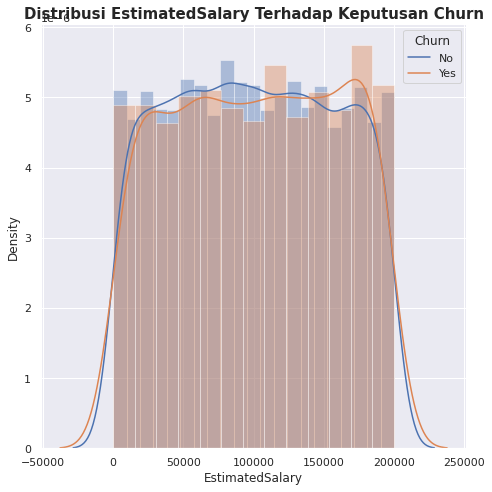

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.FacetGrid(df_eda, hue="Exited", height=7) \
.map(sns.distplot, "EstimatedSalary")
plt.title('Distribusi EstimatedSalary Terhadap Keputusan Churn', fontweight='bold', fontsize=15)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [ ]:
check_zero = df_eda[['EstimatedSalary', 'Balance']]
check_zero[check_zero['EstimatedSalary'] == 0]

,EstimatedSalary,Balance


In [ ]:
check_zero.sort_values(by='EstimatedSalary')

,EstimatedSalary,Balance
2362,11.58,122917.71
9647,90.07,0.00
9010,91.75,121669.93
5548,96.27,0.00
4989,106.67,0.00
...,...,...
8926,199909.32,0.00
9096,199929.17,178755.84
4417,199953.33,153325.10
3580,199970.74,98635.77


In [ ]:
check_zero[check_zero['EstimatedSalary'] < 1000].count()

EstimatedSalary    59
Balance            59
dtype: int64

In [ ]:
check_zero.min()

EstimatedSalary    11.58
Balance             0.00
dtype: float64

#### **Heatmap**

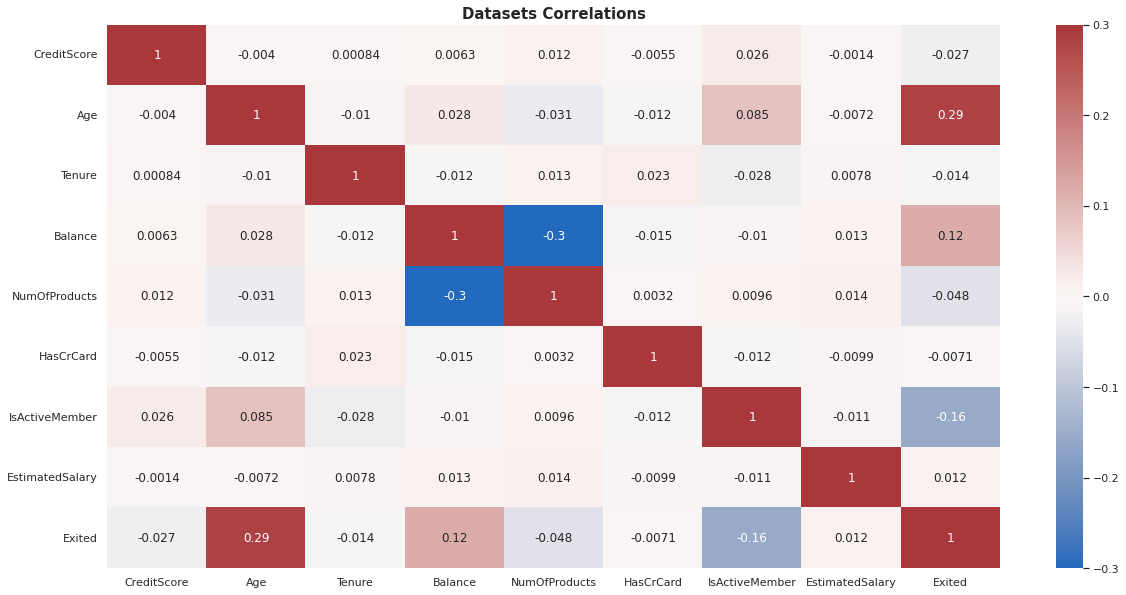

In [ ]:
# Draw the heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot=True, vmin=-0.3, vmax=0.3, cmap='vlag')
plt.title("Datasets Correlations", fontweight='bold', fontsize=15)
plt.xticks(rotation=0)
fig.show()

### **Data Preprocessing**

#### **Data Preprocessing Preparation**

In [ ]:
df_prep = df_eda.copy()

#### **Outliers Handling**

##### **1. CreditScore**

In [ ]:
# handling outliers using IQR
Q1 = df_prep['CreditScore'].quantile(.25)
Q3 = df_prep['CreditScore'].quantile(.75)
IQR = Q3-Q1
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

# replace outliers with min threshold value
df_prep['CreditScore'] = df_prep['CreditScore'].mask(((df_prep['CreditScore'] 
                                                       < min_IQR)), min_IQR)
df_prep.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


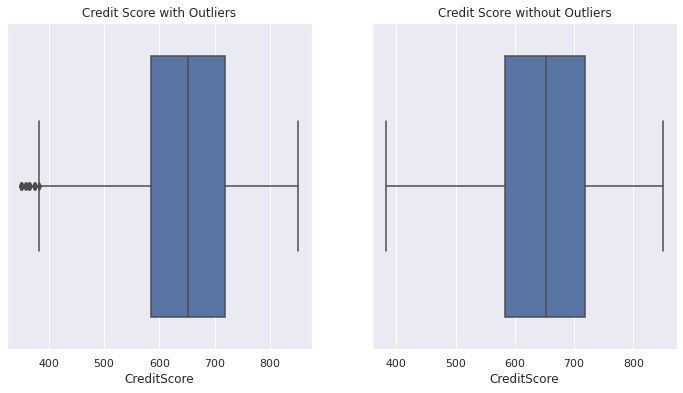

In [ ]:
# outliers has been removed
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df['CreditScore'], ax=ax[0])
sns.boxplot(df_prep['CreditScore'], ax=ax[1])
ax[0].set_title('Credit Score with Outliers')
ax[1].set_title('Credit Score without Outliers')
plt.show()

##### **2. Age**

In [ ]:
# Mencari Q1 dan Q3, kemudian menghitung IQR
Q1 = np.quantile(df_prep['Age'], .25)
Q3 = np.quantile(df_prep['Age'], .75)
IQR = Q3 - Q1

# Hitung IQR minimum dan maksimum
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR


df_prep['Age'] = df_prep['Age'].mask(df_prep['Age'] < min_IQR)
df_prep['Age'] = df_prep['Age'].mask((df_prep['Age'] > max_IQR), max_IQR)
df_prep.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


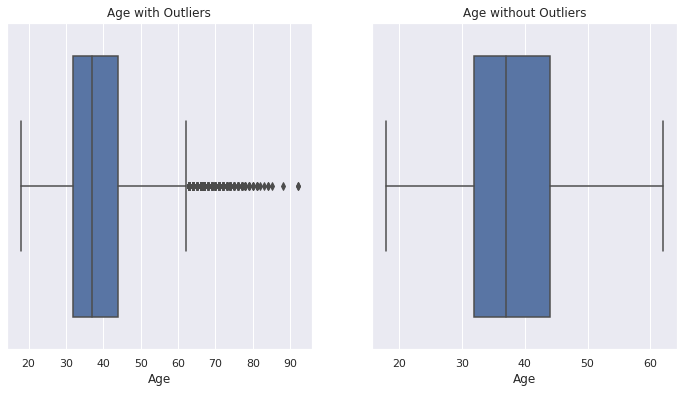

In [ ]:
# outliers has been removed
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df['Age'], ax=ax[0])
sns.boxplot(df_prep['Age'], ax=ax[1])
ax[0].set_title('Age with Outliers')
ax[1].set_title('Age without Outliers')
plt.show()

#### **Data Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories=[['France', 'Spain', 'Germany']], handle_unknown='ignore', sparse=False)
y = np.array(df_prep['Geography']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)
df_prep[['Geography_France','Geography_Spain','Geography_Germany']] = y_transform
df_prep.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [ ]:
df_prep = df_prep.drop(labels='Geography', axis=1)
df_prep

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories=[['Female', 'Male']], handle_unknown='ignore', sparse=False)
y = np.array(df_prep['Gender']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)
df_prep[['Gender_Female','Gender_Male']] = y_transform
df_prep.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0,1.0,0.0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_prep.drop(columns=['Gender'], axis=1, inplace=True)
df_prep

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,0.0,1.0,0.0,1.0


#### **Preparing XY for Model**

In [ ]:
df_prep

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_binary,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0,1.0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X = df_prep.drop(columns=['Exited'])
y = df_prep['Exited']

####**Imbalance Handling**

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=123)

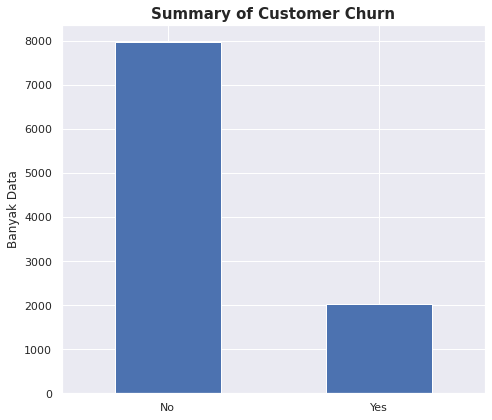

In [ ]:
fig = plt.figure(figsize=(7,6))
y.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('Summary of Customer Churn', fontweight='bold', fontsize=15)
plt.ylabel('Banyak Data')
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

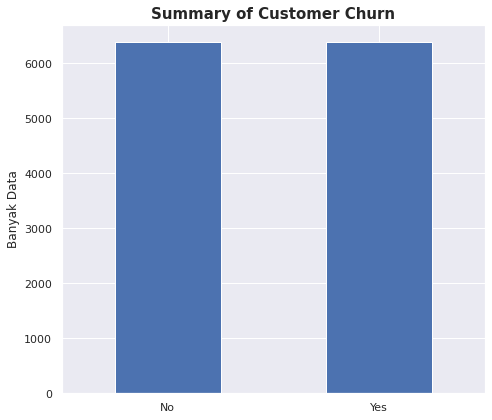

In [ ]:
fig = plt.figure(figsize=(7,6))
y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('Summary of Customer Churn', fontweight='bold', fontsize=15)
plt.ylabel('Banyak Data')
plt.tight_layout()
plt.show()

#### **Scaling**

In [ ]:
# standard scaler all columns
# fit scaler to train data only
# kenapa pakai ini

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
scaler = MinMaxScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(X_smote.columns)
scaler.fit(X_smote[columns])

X_smote_scaled = scaler.transform(X_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_smote[columns] = X_smote_scaled
X_test[columns] = X_test_scaled

In [ ]:
X_smote.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,0.730193,0.272727,1.0,0.000000,0.333333,1.0,1.0,0.271296,1.0,0.0,0.0,0.0,1.0
1,0.479657,0.477273,1.0,0.000000,0.666667,1.0,0.0,0.663711,1.0,0.0,0.0,1.0,0.0
2,0.858672,0.386364,0.3,0.000000,0.333333,0.0,0.0,0.407399,0.0,1.0,0.0,0.0,1.0
3,0.665953,0.500000,0.9,0.000000,0.333333,1.0,0.0,0.202277,1.0,0.0,0.0,0.0,1.0
4,0.689507,0.340909,0.3,0.575644,0.333333,1.0,0.0,0.569222,1.0,0.0,0.0,0.0,1.0


In [ ]:
y_smote.value_counts()

1    6377
0    6377
Name: Exited, dtype: int64

### **Modeling**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

#### **Training with Default Parameters**

##### **RandomForest**

In [ ]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)

RandomForestClassifier()

##### **XGBoost**

In [ ]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_smote, y_smote)

XGBClassifier()

##### **Training**

In [ ]:
import time
from sklearn import metrics

perf_without_params = []
models_without_params = []
models_without_params.append(['Random Forest Classifier', rf])
models_without_params.append(['XGBoost Classifier', xgb])

for i, v in models_without_params:
    start_time = time.time()
    accuracy = metrics.accuracy_score(y_smote, v.predict(X_smote))
    auc = roc_auc_score(y_smote, v.predict_proba(X_smote)[:,1])
    confusion_matrix = metrics.confusion_matrix(y_smote, v.predict(X_smote))
    classification = metrics.classification_report(y_smote, v.predict(X_smote))
    f1_score = metrics.f1_score(y_smote, v.predict(X_smote))
    end_time = time.time()
    final_time = end_time - start_time
    perf_without_params.append([i, f1_score, accuracy, final_time])

    print()
    print('============================== {} Model Evaluation Without Tuning =============================='.format(i))
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("F1 Score:" "\n", f1_score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print("AUC Score :" "\n", auc)
    print()
    print('============================== Lama Training: {} =============================='.format(final_time))


============================== Random Forest Classifier Model Evaluation Without Tuning ==============================

Model Accuracy:
 0.9999215932256547

F1 Score:
 0.999921599372795

Confusion matrix:
 [[6376    1]
 [   0 6377]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6377
           1       1.00      1.00      1.00      6377

    accuracy                           1.00     12754
   macro avg       1.00      1.00      1.00     12754
weighted avg       1.00      1.00      1.00     12754


AUC Score :
 1.0
============================== Lama Training: 1.0252423286437988 ==============================

============================== XGBoost Classifier Model Evaluation Without Tuning ==============================

Model Accuracy:
 0.8858397365532382

F1 Score:
 0.8816452609331816

Confusion matrix:
 [[5875  502]
 [ 954 5423]]

Classification report:
               precision    recall  f1-score   

##### **Testing**

In [ ]:
import time
from sklearn import metrics

for i, v in models_without_params:
    start_time = time.time()
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    auc = roc_auc_score(y_test, v.predict_proba(X_test)[:,1])
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    f1_score = metrics.f1_score(y_test, v.predict(X_test))
    end_time = time.time()
    final_time = end_time - start_time
    perf_without_params.append([i,f1_score, accuracy, final_time])

    print()
    print('============================== {} Model Evaluation Without Tuning =============================='.format(i))
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("F1 Score:" "\n", f1_score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print("AUC Score :" "\n", auc)
    print()
    print('============================== Lama Training: {} =============================='.format(final_time))


============================== Random Forest Classifier Model Evaluation Without Tuning ==============================

Model Accuracy:
 0.8485

F1 Score:
 0.5866302864938607

Confusion matrix:
 [[1482  104]
 [ 199  215]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1586
           1       0.67      0.52      0.59       414

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000


AUC Score :
 0.8416328563334978

============================== Lama Training: 0.2976069450378418 ==============================

============================== XGBoost Classifier Model Evaluation Without Tuning ==============================

Model Accuracy:
 0.856

F1 Score:
 0.6363636363636365

Confusion matrix:
 [[1460  126]
 [ 162  252]]

Classification report:
               precision    recall  f1-score   support


In [ ]:
pd.DataFrame(perf_without_params)

,0,1,2,3
0,Random Forest Classifier,1.000000,1.000000,0.819040
1,XGBoost Classifier,0.883218,0.887329,0.190053
2,Random Forest Classifier,0.604278,0.852000,0.237223
3,XGBoost Classifier,0.631043,0.855000,0.049525


#### **Finding Best Parameters**

##### **RandomForest**

In [ ]:
rfc = RandomForestClassifier()
param_grid = {
    n_estimators=[100, 200, 300],
    criterion=['gini', 'entropy'],
    max_depth=range(5,16)
}
RF_Classifier = GridSearchCV(rfc, param_grid, cv=10, scoring='f1_micro', 
                             return_train_score=False)
RF_Classifier.fit(X_smote, y_smote)

print('parameter ',RF_Classifier.best_params_)
print('f1_micro ',RF_Classifier.best_score_)

parameter  {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
akurasi  0.8949588788493454


##### **XGBoost**

In [ ]:
# XGBoost
xgb = XGBClassifier()
param_grid = {
    'n_estimators':[100, 200, 300, 400, 500],
    'min_child_weight':range(1,11),
    'gamma':[1, 2]
}
XGB_Classifier = GridSearchCV(xgb, param_grid, cv=10, scoring='f1_micro', 
                              return_train_score=False)
XGB_Classifier.fit(X_smote, y_smote)

print('parameter ',XGB_Classifier.best_params_)
print('f1_micro ',XGB_Classifier.best_score_)

parameter  {'gamma': 1, 'min_child_weight': 2, 'n_estimators': 500}
f1_micro  0.8854702194357367


#### **Training with Best Parameters**

##### **RandomForest**

In [ ]:
rf_tuned = RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=15)
rf_tuned.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=15, n_estimators=200)

##### **XGBoost**

In [ ]:
xgb_tuned = XGBClassifier(gamma=1, min_child_weight=2, n_estimators=500)
xgb_tuned.fit(X_smote, y_smote)

XGBClassifier(gamma=1, min_child_weight=2, n_estimators=500)

##### **Training**

In [ ]:
perf = []
models = []
models.append(['Random Forest Classifier', rf_tuned])
models.append(['XGBoost Classifier', xgb_tuned])

for i, v in models:
    start_time = time.time()
    accuracy = metrics.accuracy_score(y_smote, v.predict(X_smote))
    auc = roc_auc_score(y_smote, v.predict_proba(X_smote)[:,1])
    confusion_matrix = metrics.confusion_matrix(y_smote, v.predict(X_smote))
    classification = metrics.classification_report(y_smote, v.predict(X_smote))
    f1_score = metrics.f1_score(y_smote, v.predict(X_smote))
    end_time = time.time()
    final_time = end_time - start_time
    perf.append([i, f1_score, accuracy, final_time])

    print()
    print('============================== {} Model Evaluation Tuned =============================='.format(i))
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("F1 Score:" "\n", f1_score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print("AUC Score :" "\n", auc)
    print()
    print('============================== Lama Training: {} =============================='.format(final_time))


============================== Random Forest Classifier Model Evaluation Tuned ==============================

Model Accuracy:
 0.9906695938529089

F1 Score:
 0.9906571406139594

Confusion matrix:
 [[6326   51]
 [  68 6309]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6377
           1       0.99      0.99      0.99      6377

    accuracy                           0.99     12754
   macro avg       0.99      0.99      0.99     12754
weighted avg       0.99      0.99      0.99     12754


AUC Score :
 0.9995653385155004

============================== Lama Training: 1.973005771636963 ==============================

============================== XGBoost Classifier Model Evaluation Tuned ==============================

Model Accuracy:
 0.9066175317547436

F1 Score:
 0.9035080612492911

Confusion matrix:
 [[5987  390]
 [ 801 5576]]

Classification report:
               precision    recall  f1-score   su

##### **Testing**

In [ ]:
for i, v in models:
    start_time = time.time()
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    auc = roc_auc_score(y_test, v.predict_proba(X_test)[:,1])
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    f1_score = metrics.f1_score(y_test, v.predict(X_test))
    end_time = time.time()
    final_time = end_time - start_time
    perf.append([i, f1_score, accuracy, final_time])

    print()
    print('============================== {} Model Evaluation Tuned =============================='.format(i))
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("F1 Score:" "\n", f1_score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print("AUC Score :" "\n", auc)
    print()
    print('============================== Lama Testing: {} =============================='.format(final_time))


============================== Random Forest Classifier Model Evaluation Tuned ==============================

Model Accuracy:
 0.8555

F1 Score:
 0.6162018592297476

Confusion matrix:
 [[1479  107]
 [ 182  232]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1586
           1       0.68      0.56      0.62       414

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000


AUC Score :
 0.8485540752112384

============================== Lama Testing: 0.5260164737701416 ==============================

============================== XGBoost Classifier Model Evaluation Tuned ==============================

Model Accuracy:
 0.8615

F1 Score:
 0.6506935687263555

Confusion matrix:
 [[1465  121]
 [ 156  258]]

Classification report:
               precision    recall  f1-score   support

           0     

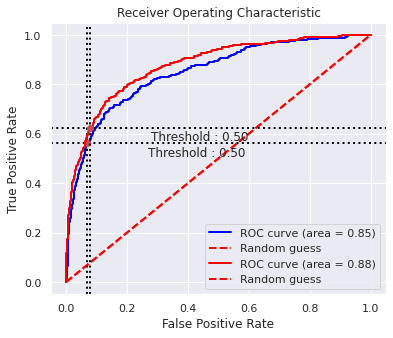

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
rf_proba = rf_tuned.predict_proba(X_test)[:,1]
xgb_proba = xgb_tuned.predict_proba(X_test)[:,1]

bc_rf = BinaryClassification(y_test, rf_proba, labels=["Class 1", "Class 2"])
bc_xgb = BinaryClassification(y_test, xgb_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(6,5))
bc_rf.plot_roc_curve(c_roc_curve='blue')
bc_xgb.plot_roc_curve(c_roc_curve='red')
plt.show()

### **Model Evaluation**

In [ ]:
eval = pd.DataFrame(perf_without_params)
eval = eval.rename({0:'Model', 1:'F1-Score', 2:'Accuracy', 3:'Running Time(s)'}, axis=1)
eval = eval.rename({0:'Training', 1:'Training', 2:'Testing', 3:'Testing'}, axis=0)
eval

,Model,F1-Score,Accuracy,Running Time(s)
Training,Random Forest Classifier,1.000000,1.000000,0.819040
Training,XGBoost Classifier,0.883218,0.887329,0.190053
Testing,Random Forest Classifier,0.604278,0.852000,0.237223
Testing,XGBoost Classifier,0.631043,0.855000,0.049525


In [ ]:
eval_tuned = pd.DataFrame(perf)
eval_tuned = eval_tuned.rename({0:'Model', 1:'F1-Score', 2:'Accuracy', 3:'Running Time(s)'}, axis=1)
eval_tuned = eval_tuned.rename({0:'Training', 1:'Training', 2:'Testing', 3:'Testing'}, axis=0)
eval_tuned

,Model,F1-Score,Accuracy,Running Time(s)
Training,Random Forest Classifier,0.990416,0.990434,1.532557
Training,XGBoost Classifier,0.900381,0.903638,0.684930
Testing,Random Forest Classifier,0.605333,0.852000,0.456696
Testing,XGBoost Classifier,0.641124,0.859500,0.111273
